## Project Outline

**Task 1**: Introduction (this section)

**Task 2**: Exploratory Data Analysis and Preprocessing

**Task 3**: Training/Validation Split

**Task 4**: Loading Tokenizer and Encoding our Data

**Task 5**: Setting up BERT Pretrained Model

**Task 6**: Creating Data Loaders

**Task 7**: Setting Up Optimizer and Scheduler

**Task 8**: Defining our Performance Metrics

**Task 9**: Creating our Training Loop

**Task 10**: Loading and Evaluating our Model

## Task:1 Introduction

### What is BERT?

Bert is a large-scale transfomer based language model that can be finetuned for a variety of tasks.

For more information, the original paper can be found [here](https://arxiv.org/abs/1810.04805). 

[HuggingFace documentation](https://huggingface.co/transformers/model_doc/bert.html)

HuggingFace is a company, that has developed the transformer library, and they offer pytorch and tensorflow2.0 implementation of transformer model.

[Bert documentation](https://characters.fandom.com/wiki/Bert_(Sesame_Street) ;)

## Task 2: Exploratory Data Analysis and Preprocessing

We will use the SMILE Twitter dataset.

Wang, Bo; Tsakalidis, Adam; Liakata, Maria; Zubiaga, Arkaitz; Procter, Rob; Jensen, Eric (2016): SMILE Twitter Emotion dataset. figshare. Dataset. https://doi.org/10.6084/m9.figshare.3187909.v2

In [8]:
!pip3 install torch torchvision torchaudio

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/e4/ae/2ad8820045b6631965750435f28583e80905b8273d57cf026163b51323ee/torch-2.1.2-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.1.2-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/f9/e6/3c821e7417acd82df89e39f09156ce80d58817b5b4b1ac5453b522bc5dd4/torchvision-0.16.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/c9/c0/b738db223b85c0096e2c3b1aaa647419f9af68331f8ad09dba6a2d38136c/torchaudio-2.1.2-cp311-cp311-win_amd64.whl.metadata
Using cached torch-2.1.2-cp311-cp311-win_amd64.whl (192.3 MB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB 325.1 kB/s eta 0:00:04
   - ------------

In [74]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.0323, 0.5424, 0.3931],
        [0.4384, 0.9517, 0.6406],
        [0.0978, 0.4003, 0.3681],
        [0.5982, 0.2139, 0.0744],
        [0.2716, 0.7106, 0.8758]])


In [75]:
import pandas as pd
import seaborn as sns

In [296]:
df = pd.read_csv("smile-annotations-final.csv", names=['id', 'text', 'category'])
# dd = df
# dd.set_index('id', inplace=True)
# dd.index.values
type(df['category'])

pandas.core.series.Series

<Axes: >

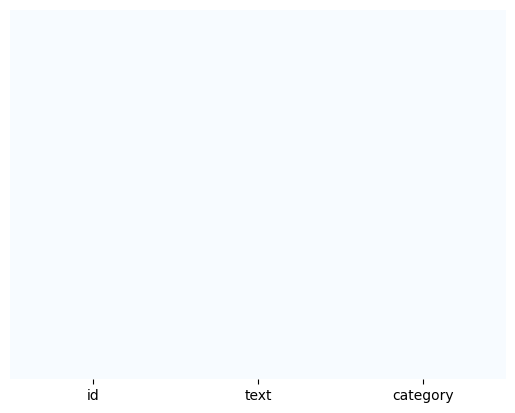

In [77]:
import seaborn as sns

sns.heatmap(df.isnull(), yticklabels = False, cmap='Blues', cbar=False)

<Axes: xlabel='category', ylabel='count'>

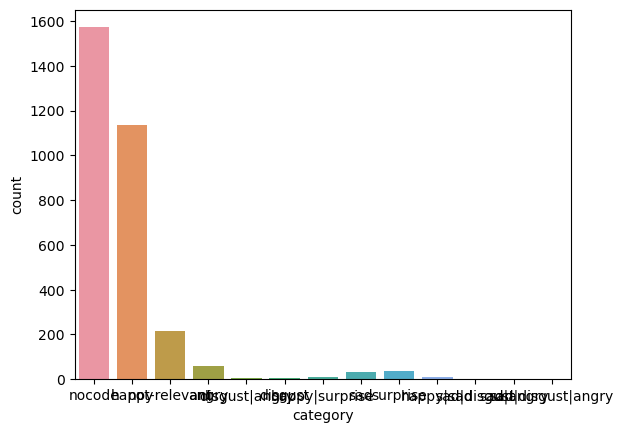

In [19]:
sns.countplot(x = df['category'])

In [78]:
df['category'].value_counts()

category
nocode               1572
happy                1137
not-relevant          214
angry                  57
surprise               35
sad                    32
happy|surprise         11
happy|sad               9
disgust|angry           7
disgust                 6
sad|disgust             2
sad|angry               2
sad|disgust|angry       1
Name: count, dtype: int64

In [79]:
df = df.drop(df[df['category'] == 'nocode'].index)
df = df.drop(df[df['category'] == 'happy|surprise'].index)
df = df.drop(df[df['category'] == 'happy|sad'].index)
df = df.drop(df[df['category'] == 'disgust|angry'].index)
df = df.drop(df[df['category'] == 'sad|disgust'].index)
df = df.drop(df[df['category'] == 'sad|angry'].index)
df = df.drop(df[df['category'] == 'sad|disgust|angry'].index)

In [80]:
df['category'].value_counts()

category
happy           1137
not-relevant     214
angry             57
surprise          35
sad               32
disgust            6
Name: count, dtype: int64

In [231]:
def category_to_index(category):
    possible_labels=df['category'].unique()
    label_dict = {}
    for index, label in enumerate(possible_labels):
        label_dict[label] = index
    print(label_dict)
    return label_dict[category]

df['label'] = df['category'].apply(category_to_index)

{'happy': 0, 'not-relevant': 1, 'angry': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
{'happy': 0, 'not-relevant': 1, 'angry': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
{'happy': 0, 'not-relevant': 1, 'angry': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
{'happy': 0, 'not-relevant': 1, 'angry': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
{'happy': 0, 'not-relevant': 1, 'angry': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
{'happy': 0, 'not-relevant': 1, 'angry': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
{'happy': 0, 'not-relevant': 1, 'angry': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
{'happy': 0, 'not-relevant': 1, 'angry': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
{'happy': 0, 'not-relevant': 1, 'angry': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
{'happy': 0, 'not-relevant': 1, 'angry': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
{'happy': 0, 'not-relevant': 1, 'angry': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
{'happy': 0, 'not-relevant': 1, 'angry': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
{'ha

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1481 entries, 1 to 3083
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1481 non-null   int64 
 1   text      1481 non-null   object
 2   category  1481 non-null   object
 3   label     1481 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 57.9+ KB


In [196]:
df['label'].value_counts()

label
0    1137
1     214
2      57
5      35
4      32
3       6
Name: count, dtype: int64

## Task: 3 Training/Validation Split

In [89]:
from sklearn.model_selection import train_test_split

X = df['id']
y = df['label']
X_train, X_val, y_train, y_vao = train_test_split(X, y, test_size = 0.15, random_state = 17, stratify=y)

In [141]:
df['data_type'] = 'not_set'

In [142]:
type(X_train.values)

numpy.ndarray

In [144]:
def data_type_allocation(id):
    x = X_train.values
    if id in x:
        data_type = 'Train'
    else:
        data_type = 'Val'
    return data_type

df['data_type'] = df['id'].apply(data_type_allocation)

In [150]:
df[df['data_type'] == 'Train']

,id,text,category,label,data_type
1,614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,0,Train
2,614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy,0,Train
3,614877582664835073,@Sofabsports thank you for following me back. ...,happy,0,Train
4,611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy,0,Train
5,611570404268883969,@NationalGallery @ThePoldarkian I have always ...,happy,0,Train
...,...,...,...,...,...
3078,611258135270060033,@_TheWhitechapel @Campaignforwool @SlowTextile...,not-relevant,1,Train
3079,612214539468279808,“@britishmuseum: Thanks for ranking us #1 in @...,happy,0,Train
3080,613678555935973376,MT @AliHaggett: Looking forward to our public ...,happy,0,Train
3082,615246897670922240,@MrStuchbery @britishmuseum Mesmerising.,happy,0,Train


In [151]:
df.shape

(1481, 5)

In [153]:
df.groupby(['category','label', 'data_type']).count()

id  text
category     label data_type           
angry        2     Train       48    48
                   Val          9     9
disgust      3     Train        5     5
                   Val          1     1
happy        0     Train      966   966
                   Val        171   171
not-relevant 1     Train      182   182
                   Val         32    32
sad          4     Train       27    27
                   Val          5     5
surprise     5     Train       30    30
                   Val          5     5

## Task:4 Tokenization

In [155]:
!pip3 install transformers

In [159]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset #To setup our dataset so that is is uasable in pytorch environment

In [160]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

C:\Users\HP\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [173]:
input_text_train = df[df['data_type'] == "Train"]['text'].values

input_text_val = df[df['data_type'] == "Val"]['text'].values

In [188]:
encoded_train_data = tokenizer.batch_encode_plus(
    input_text_train, 
    add_special_tokens = True,
    return_attention_mask = True,
    padding='longest',
    max_length = 256,
    return_tensors = 'pt'
)

encoded_val_data = tokenizer.batch_encode_plus(
    input_text_val, 
    add_special_tokens = True,
    return_attention_mask = True,
    padding='longest',
    max_length = 256,
    return_tensors = 'pt'
)



input_ids_train = encoded_train_data['input_ids']
attention_masks_train = encoded_train_data['attention_mask']
labels_train = torch.tensor(df[df['data_type'] =='Train'].label.values)

input_ids_val = encoded_val_data['input_ids']
attention_masks_val = encoded_val_data['attention_mask']
labels_val = torch.tensor(df[df['data_type'] =='Val'].label.values)


In [189]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

## Task 5: Setting up BERT Pretrained Model

In [192]:
from transformers import BertForSequenceClassification

In [203]:
BERT_model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased', 
    num_labels = 6,
    output_hidden_states = False,
    output_attentions = False
)#Here, we imported the pretrained model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Task 6: Creating Data Loaders

In [211]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

#Dataloaders offers a nice way to iterate through the dataset in batchs

#Samplers are basically a way in which we sample from the dataset

In [212]:
batch_size = 4 #Because of limited computational power we reduce the batch_size

dataloader_train = DataLoader(
    dataset_train,
    sampler = RandomSampler(dataset_train), #It is better to use random here because, it will elminate the possibility of learning between the sequence of tweets
    batch_size = batch_size
)

dataloader_val = DataLoader(
    dataset_val,
    sampler = SequentialSampler(dataset_val),
    batch_size = 32 # We can increase the batch_size because first validation set is small
                    # And also, we don't have to do any backpropagation hear so, we can increase the batch size here
)

## Task 7: Seeting Up Optimizer and Scheduler

Optimizer is basically just defining the learning rate

In [214]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [220]:
optimizer = AdamW(
    BERT_model.parameters(),
    lr =1e-5,
    eps = 1e-8
)

In [222]:
epochs = 10

#scheduler adjust the learning rate as the training goes on based on how its going
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = 0,
    num_training_steps = len(dataloader_train)*epochs
)

## Task 8: Defining Performance Metrics

Accuracy metric approach originally used in accuracy function in [this tutorial](https://mccormickml.com/2019/07/22/BERT-fine-tuning/#41-bertforsequenceclassification).

In [224]:
import numpy as np
from sklearn.metrics import f1_score

In [230]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')

In [234]:
labels_dict = {'happy': 0, 'not-relevant': 1, 'angry': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}

def accuracy_per_class(preds, labels):
    labels_dict_invers = {v: k for k, v in labels_dict.items()}
    
    preds_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_pred = preds_flat[labels_flat == label]
        y_true = labels_flat[labels_flat == label]
        
        accuracy = len(y_pred[y_pred==label])/len(y_true)
        print(f'Class: {labels_dict_invers[label]} ')
        print(f'Accuracy = {accuracy}\n')
    

## Task 9: Crating our Training Loop

Approach adapted from an older version of HuggingFace's `run_glue.py` script. Accessible [here](https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128).

In [256]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [257]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

BERT_model.to(device)
print(device)


cpu


In [258]:
def evaluate(dataloader_val):

    BERT_model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = BERT_model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals


In [278]:
from tqdm.notebook import tqdm

for epoch in tqdm(range(1, epochs+1)):
    
    BERT_model.train()
    
    loss_train_total = 0
    
    progess_bar = tqdm(dataloader_train,
                      desc = 'Epoch {:1d}'.format(epoch),
                      leave = False, #Overwrite = True
                      disable=False)
    
    for batch in progess_bar:
        
        BERT_model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {
            'input_ids': batch[0],
            'attention_mask' : batch[1],
            'labels': batch[2]
        }
        
        outputs = BERT_model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss
        loss.backward()
        
        torch.nn.utils.clip_grad_norm(BERT_model.parameters(), 1.0) 
        
        optimizer.step()
        scheduler.step()
        
        progess_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
    
    torch.save(BERT_model.state_dict(), f'Models/BERT_ft_epoch{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}\n')
    
    loss_train_avg = loss_train_total/len(dataloader_train) 
    
    tqdm.write(f'Training Loss: {loss_train_avg}\n')
    
    val_loss, pred, true = evaluate(dataloader_val)
    val_f1 = f1_score_func(pred, true)
    tqdm.write(f'Validation Loss: {val_loss}\n')
    tqdm.write(f'Validation F1 score: {val_f1}\n')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/315 [00:00<?, ?it/s]

C:\Users\HP\AppData\Local\Temp\ipykernel_8676\997189181.py:32: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(BERT_model.parameters(), 1.0)



Epoch 1

Training Loss: 0.306550532579422

Validation Loss: 0.763178570994309

Validation F1 score: 0.8317044567431131



Epoch 2:   0%|          | 0/315 [00:00<?, ?it/s]

C:\Users\HP\AppData\Local\Temp\ipykernel_8676\997189181.py:32: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(BERT_model.parameters(), 1.0)



Epoch 2

Training Loss: 0.21375982463359833

Validation Loss: 0.7901571201426643

Validation F1 score: 0.8115872039833827



Epoch 3:   0%|          | 0/315 [00:00<?, ?it/s]

C:\Users\HP\AppData\Local\Temp\ipykernel_8676\997189181.py:32: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(BERT_model.parameters(), 1.0)



Epoch 3

Training Loss: 0.13591043651103973

Validation Loss: 0.7910968725170408

Validation F1 score: 0.8390409457536565



Epoch 4:   0%|          | 0/315 [00:00<?, ?it/s]

C:\Users\HP\AppData\Local\Temp\ipykernel_8676\997189181.py:32: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(BERT_model.parameters(), 1.0)


KeyboardInterrupt: 

## Task 10: Loading and Evaluating our Model

In [281]:
BERT_model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [282]:
BERT_model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [284]:
BERT_model.load_state_dict(torch.load('Models/BERT_ft_epoch1.model'))

<All keys matched successfully>

In [285]:
loss, predictions, true_values = evaluate(dataloader_val)

In [286]:
accuracy_per_class(predictions, true_values)

Class: happy 
Accuracy = 0.9766081871345029

Class: not-relevant 
Accuracy = 0.5

Class: angry 
Accuracy = 0.7777777777777778

Class: disgust 
Accuracy = 0.0

Class: sad 
Accuracy = 0.0

Class: surprise 
Accuracy = 0.2



In [292]:
l = [1, 2, 3, 4, 5, 6]
for i in l:
    #print(l)
    print(i)
    l.remove(i)
    print(l)

1
[2, 3, 4, 5, 6]
3
[2, 4, 5, 6]
5
[2, 4, 6]
